# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [45]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
browser = Browser('chrome')

In [47]:
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [48]:
html = browser.html
mmision_soup = soup(html, 'html.parser')

In [49]:
table = mmision_soup.find('table')
rows = table.find_all('tr')

rows

[<tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>,
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-2

In [50]:

w_data = []

for row in rows:
    cols = row.find_all('td')
    cols = [element.text.strip() for element in cols]
    w_data.append([element for element in cols if element])

w_data

[[],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-7

In [51]:
colum = ['id', 'terrestrial_date','sol', 'ls', 'month', 'min_temp', 'pressure']
mwd = pd.DataFrame(w_data, columns = colum)

In [52]:
mwd.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,None,None,None,None,None,None,None
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0


In [53]:
mwd.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [54]:
mwd['terrestrial_date'] = pd.to_datetime(mwd['terrestrial_date'])
mwd['sol'] = mwd['sol'].fillna(0).astype(int)
mwd['ls'] = mwd['ls'].fillna(0).astype(int)
mwd['month'] = mwd['month'].fillna(0).astype(int)
mwd['min_temp'] = mwd['min_temp'].fillna(0).astype(float)
mwd['pressure'] = mwd['pressure'].fillna(0).astype(float)

In [55]:
mwd.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [56]:
no_months = mwd.groupby('month')['month'].count()
no_months

month
0       1
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [57]:
martian_days = len(mwd)
martian_days

1868

In [58]:
almt = mwd.groupby('month')['min_temp'].mean()
almt

month
0      0.000000
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

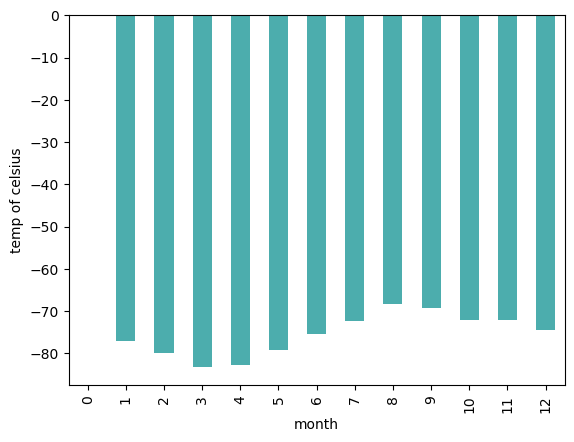

In [59]:
atmb = almt.plot(kind="bar", color="darkcyan", alpha=0.7)


plt.ylabel("temp of celsius")
plt.xlabel("month")
plt.show()

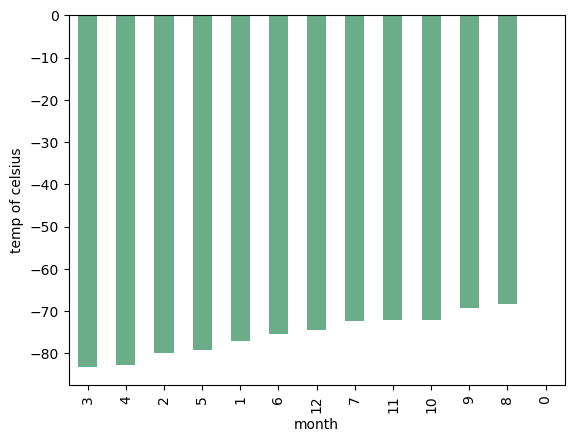

In [60]:
ordered_by_hot_cold = almt.sort_values(ascending=True)
hcc = ordered_by_hot_cold.plot(kind="bar", color="seagreen", alpha=0.7)
plt.ylabel("temp of celsius")
plt.xlabel("month")
plt.show()

In [62]:
apmm = mwd.groupby('month')['pressure'].mean()
apmm

month
0       0.000000
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

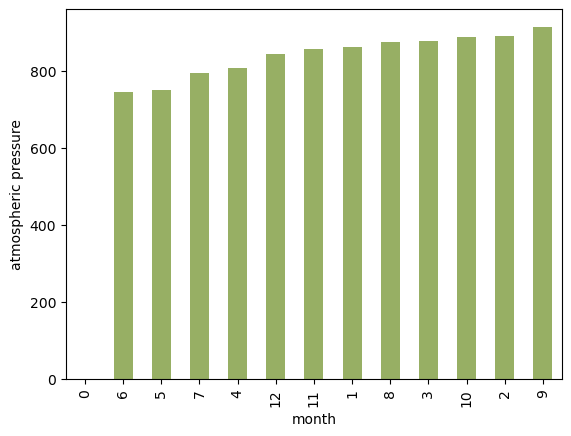

In [63]:
new_apmm = apmm.sort_values(ascending=True)
hcc = new_apmm.plot(kind="bar", color="olivedrab", alpha=0.7)


plt.ylabel("atmospheric pressure")
plt.xlabel("month")
plt.show()

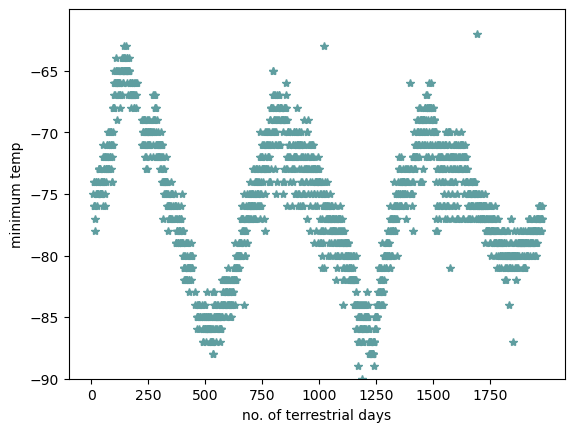

In [64]:
plt.plot(mwd['sol'], mwd['min_temp'], marker='*',linestyle = 'none', color='cadetblue')

plt.ylabel("minimum temp")

plt.xticks([0, 250, 500, 750, 1000, 1250, 1500, 1750])
plt.yticks([-90, -85, -80, -75, -70, -65])
plt.yticks(range(-90, -64, 5))
plt.ylim(-90, -60)


plt.xlabel("no. of terrestrial days")
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

In [65]:
# Write the data to a CSV
mwd.to_csv('path_to_file.csv', index=False)

In [66]:
browser.quit()